In [51]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# 导入数据
data= pd.read_csv('project_data_V1.csv')
print(data.columns.values)
list_data = [data]

['Lchange' 'laneid' 'carid' 'frameid' 'X_lead_Car' 'X_follow_Car' 'X_rel'
 'V_lead_Car' 'V_follow_Car' 'V_rel' 'ins_acc' 'leading_car_length'
 'leading_car_width' 'following_Car_length' 'following_car_width'
 'difference_centroid' 'heading_lead' 'heading_follow' 'heading_changes']


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105712 entries, 0 to 105711
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Lchange               105712 non-null  int64  
 1   laneid                105712 non-null  int64  
 2   carid                 105712 non-null  int64  
 3   frameid               105712 non-null  int64  
 4   X_lead_Car            105712 non-null  float64
 5   X_follow_Car          105712 non-null  float64
 6   X_rel                 105712 non-null  float64
 7   V_lead_Car            105712 non-null  float64
 8   V_follow_Car          105712 non-null  float64
 9   V_rel                 105712 non-null  float64
 10  ins_acc               105712 non-null  float64
 11  leading_car_length    105712 non-null  float64
 12  leading_car_width     105712 non-null  float64
 13  following_Car_length  105712 non-null  float64
 14  following_car_width   105712 non-null  float64
 15  

In [54]:
data.head()

,Lchange,laneid,carid,frameid,X_lead_Car,X_follow_Car,X_rel,V_lead_Car,V_follow_Car,V_rel,ins_acc,leading_car_length,leading_car_width,following_Car_length,following_car_width,difference_centroid,heading_lead,heading_follow,heading_changes
0,0,6,1,497,297.0,93.1,204.0,61.5,86.9,-25.4,1.07,5.60,2.06,3.98,1.77,209.0,76.7,76.2,0.44
1,0,6,1,498,298.0,94.0,204.0,61.6,87.0,-25.4,1.27,5.60,2.06,4.12,1.77,209.0,76.7,76.2,0.45
2,0,6,1,499,299.0,94.6,204.0,61.7,87.1,-25.4,0.46,5.60,2.06,3.98,1.77,209.0,76.5,76.5,0.06
3,0,6,1,509,304.0,103.0,201.0,61.9,87.7,-25.8,-2.25,5.75,2.21,3.98,1.77,206.0,76.3,76.0,0.33
4,0,6,1,526,314.0,117.0,197.0,57.7,88.1,-30.4,2.19,5.45,2.06,3.98,1.62,202.0,76.0,78.1,-2.12


In [55]:
data.describe()

,Lchange,laneid,carid,frameid,X_lead_Car,X_follow_Car,X_rel,V_lead_Car,V_follow_Car,V_rel,ins_acc,leading_car_length,leading_car_width,following_Car_length,following_car_width,difference_centroid,heading_lead,heading_follow,heading_changes
count,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000,105712.000000
mean,0.001372,3.279968,180.728650,1261.971924,371.949203,417.357210,57.651443,85.316939,85.239580,0.077246,-0.016030,4.669588,1.893351,4.683871,1.891837,59.738109,180.843946,180.829893,0.013506
std,0.037011,1.691703,117.046348,773.563801,175.470893,176.520084,47.583313,12.506917,12.512905,9.762737,2.535659,0.383357,0.143478,0.385646,0.144389,46.553881,87.691308,87.685506,1.035741
min,0.000000,0.000000,1.000000,1.000000,71.900000,76.000000,0.000000,32.500000,32.000000,-51.700000,-6.960000,3.540000,1.330000,3.540000,1.330000,0.290000,69.500000,69.500000,-39.600000
25%,0.000000,2.000000,77.000000,538.000000,222.000000,266.000000,25.800000,78.700000,78.700000,-4.590000,-1.740000,4.420000,1.770000,4.420000,1.770000,29.200000,77.200000,77.200000,-0.640000
50%,0.000000,3.000000,160.000000,1250.000000,365.000000,417.000000,43.600000,86.100000,86.200000,0.240000,0.000000,4.710000,1.910000,4.710000,1.910000,44.200000,254.000000,254.000000,0.000000
75%,0.000000,4.000000,283.000000,1980.000000,514.000000,564.000000,72.000000,93.900000,93.900000,4.820000,1.740000,4.860000,1.920000,4.860000,1.920000,72.950000,255.000000,255.000000,0.670000
max,1.000000,7.000000,510.000000,2500.000000,739.000000,742.000000,519.000000,124.000000,123.000000,61.000000,6.960000,5.750000,2.800000,5.750000,2.800000,514.000000,294.000000,294.000000,37.900000


# Delete the outlier

In [64]:
# if data is larger or smaller than 3-sigma, then the whole row should be deleted.

# Correlation

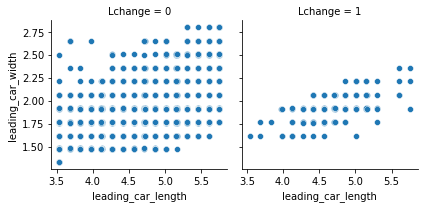

In [68]:
g = sns.FacetGrid(data, col='Lchange',)
# g.map(plt.scatter, 'leading_car_width', 'leading_car_length')
# g.map_dataframe(sns.scatterplot, 'leading_car_width', 'leading_car_length')
g.map_dataframe(sns.scatterplot, 'leading_car_length', 'leading_car_width')


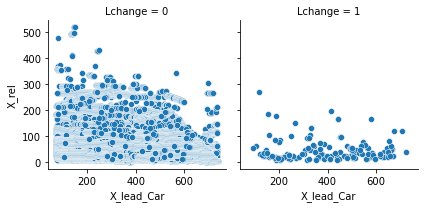

In [66]:
g = sns.FacetGrid(data, col='Lchange',)
# g.map(plt.scatter, 'X_lead_Car', 'X_rel')
g.map_dataframe(sns.scatterplot, 'X_lead_Car', 'X_rel')

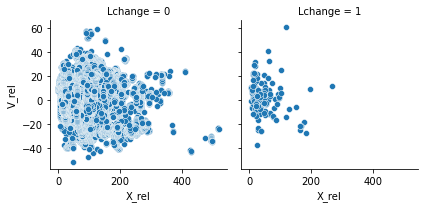

In [58]:
g = sns.FacetGrid(data, col='Lchange',)
g.map_dataframe(sns.scatterplot, 'X_rel', 'V_rel')

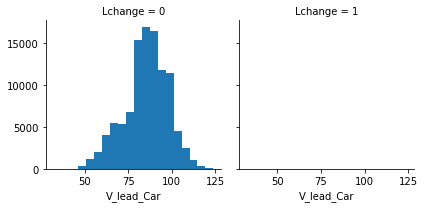

In [59]:
g = sns.FacetGrid(data, col='Lchange',)
g.map(plt.hist, 'V_lead_Car', bins=20)

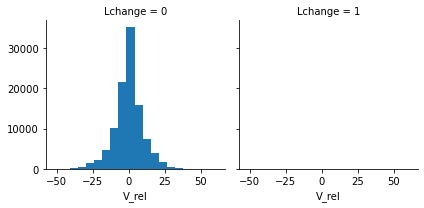

In [60]:
g = sns.FacetGrid(data, col='Lchange',)
g.map(plt.hist, 'V_rel', bins=20)

#### Based on the above two hist plot result, 
#### it could be found that there is a imbalanced situation between the data of changing lane and not.

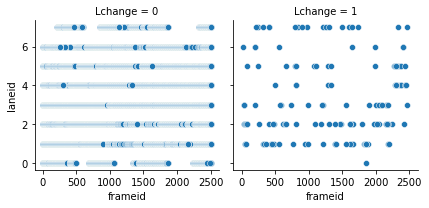

In [62]:
g = sns.FacetGrid(data, col='Lchange',)
g.map_dataframe(sns.scatterplot, 'frameid', 'laneid')

#### Most of vheicles change their lane when they are in Lane1, Lane2. 

#### On the contrary there are considerable fewer vheicles in lane0 and lane4 to change lane.